# Imports Gerais

In [1]:
# celula 1
# Arquivos e manipulação de dados
import os
import shutil
from os import listdir
from os.path import join
from glob import glob
import random
import time
import pickle

# Manipulação de dados e visualização
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imagens
import cv2
from PIL import Image

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.multiclass import OneVsRestClassifier

# Deep Learning (Keras / TensorFlow)
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
from keras.utils import Sequence, to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
from keras.applications import ResNet50, EfficientNetB0
from keras.applications.efficientnet import preprocess_input as preprocess_efficient
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# celula 2

base_dir = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1'
acel_paths = glob(base_dir + '/**/RAW_ACCELEROMETERS.txt', recursive=True)
gps_paths = glob(base_dir + '/**/RAW_GPS.txt', recursive=True)

print(" RAW_ACCELEROMETERS encontrados:", len(acel_paths))
print(" RAW_GPS encontrados:", len(gps_paths))

for i in range(min(3, len(acel_paths))):
    print(f"\n Acelerômetro {i+1}:", acel_paths[i])
    print(" Existe?", os.path.exists(acel_paths[i]))
    with open(acel_paths[i], 'r') as f:
        print(" Primeiras linhas:")
        for _ in range(5):
            print("  ", f.readline().strip())


 RAW_ACCELEROMETERS encontrados: 40
 RAW_GPS encontrados: 40

 Acelerômetro 1: D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\D1\20151110175712-16km-D1-NORMAL1-SECONDARY\RAW_ACCELEROMETERS.txt
 Existe? True
 Primeiras linhas:
   6.94 1 0.017 -0.011 0.018 -0.005 0.008 0.018 -1.523 0.015 0.012
   7.03 1 0.046 0.007 0.019 0.016 -0.002 0.018 -1.522 0.012 0.012
   7.14 1 0.052 -0.016 0.027 0.037 -0.005 0.018 -1.520 0.014 0.011
   7.24 1 0.015 -0.016 0.026 0.038 -0.009 0.024 -1.523 0.014 0.011
   7.34 1 -0.014 -0.017 0.040 0.012 -0.016 0.032 -1.525 0.012 0.011

 Acelerômetro 2: D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\D1\20151110180824-16km-D1-NORMAL2-SECONDARY\RAW_ACCELEROMETERS.txt
 Existe? True
 Primeiras linhas:
   0.59 0 0.004 -0.039 -0.013 0.000 -0.006 -0.002 -1.686 0.131 0.156
   0.59 0 0.001 -0.035 -0.011 0.001 -0.021 -0.007 -1.686 0.131 0.157
   0.59 0 -0.020 -0.017 -0.019 -0.006 -0.024 -0.012 -1.686 0.131 0.158
   0.59 0 -0.029 -0.010 -0.022 -0.0

In [5]:
# celula 3

caminho = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\D1\20151110175712-16km-D1-NORMAL1-SECONDARY\RAW_ACCELEROMETERS.txt'

df = pd.read_csv(caminho, sep='\s+', header=None)
display(" Total de linhas:", len(df))
display(" Primeiras 5 linhas:")
display(df.head())


' Total de linhas:'

6170

' Primeiras 5 linhas:'

,0,1,2,3,4,5,6,7,8,9,10
0,6.94,1,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012
1,7.03,1,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012
2,7.14,1,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011
3,7.24,1,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011
4,7.34,1,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011


In [11]:

# celula 4
# Testar rótulo em 5 pastas de viagens
semantic_files = glob(r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\**\SEMANTIC_FINAL.txt', recursive=True)

for caminho in semantic_files[:5]:
    pasta = os.path.dirname(caminho)
    nome_viagem = os.path.basename(pasta).upper()
    display(f" Pasta: {pasta}")
    display(f" Nome detectado: {nome_viagem}")

    if 'NORMAL' in nome_viagem:
        print(" Rótulo: Normal")
    elif 'AGGRESSIVE' in nome_viagem:
        print(" Rótulo: Aggressive")
    elif 'DROWSY' in nome_viagem or 'TIRED' in nome_viagem:
        print(" Rótulo: Tired")
    else:
        print("Rótulo não identificado!")
    print("---")


' Pasta: D:\\UNICAP\\2025\\QUINTO PERIODO\\IA\\MINI PROJETO\\UAH-DRIVESET-v1\\D1\\20151110175712-16km-D1-NORMAL1-SECONDARY'

' Nome detectado: 20151110175712-16KM-D1-NORMAL1-SECONDARY'

 Rótulo: Normal
---


' Pasta: D:\\UNICAP\\2025\\QUINTO PERIODO\\IA\\MINI PROJETO\\UAH-DRIVESET-v1\\D1\\20151110180824-16km-D1-NORMAL2-SECONDARY'

' Nome detectado: 20151110180824-16KM-D1-NORMAL2-SECONDARY'

 Rótulo: Normal
---


' Pasta: D:\\UNICAP\\2025\\QUINTO PERIODO\\IA\\MINI PROJETO\\UAH-DRIVESET-v1\\D1\\20151111123124-25km-D1-NORMAL-MOTORWAY'

' Nome detectado: 20151111123124-25KM-D1-NORMAL-MOTORWAY'

 Rótulo: Normal
---


' Pasta: D:\\UNICAP\\2025\\QUINTO PERIODO\\IA\\MINI PROJETO\\UAH-DRIVESET-v1\\D1\\20151111125233-24km-D1-AGGRESSIVE-MOTORWAY'

' Nome detectado: 20151111125233-24KM-D1-AGGRESSIVE-MOTORWAY'

 Rótulo: Aggressive
---


' Pasta: D:\\UNICAP\\2025\\QUINTO PERIODO\\IA\\MINI PROJETO\\UAH-DRIVESET-v1\\D1\\20151111132348-25km-D1-DROWSY-MOTORWAY'

' Nome detectado: 20151111132348-25KM-D1-DROWSY-MOTORWAY'

 Rótulo: Tired
---


In [13]:
# celula 5

# Caminho real de um arquivo com muitos dados
caminho_acc = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\D1\20151110175712-16km-D1-NORMAL1-SECONDARY\RAW_ACCELEROMETERS.txt'
caminho_gps = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\D1\20151110175712-16km-D1-NORMAL1-SECONDARY\RAW_GPS.txt'

df_acc = pd.read_csv(caminho_acc, sep='\s+', header=None, usecols=[2,3,4], names=['ax', 'ay', 'az'])
df_gps = pd.read_csv(caminho_gps, sep='\s+', header=None, usecols=[0,1,2], names=['lat', 'lon', 'speed'])

min_len = min(len(df_acc), len(df_gps))
df = pd.concat([df_acc.iloc[:min_len], df_gps.iloc[:min_len]], axis=1)

print(" Total de linhas:", len(df))

window_size = 5
features_per_second = 10
janela_amostras = window_size * features_per_second
passo_amostras = 1 * features_per_second
total_janelas = 0

for i in range(0, len(df) - janela_amostras + 1, passo_amostras):
    total_janelas += 1

print(" Total de janelas possíveis:", total_janelas)


 Total de linhas: 624
 Total de janelas possíveis: 58


# Machine Learning 

In [15]:
# celula 6
base_dir = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1'
acel_paths = glob(base_dir + '/**/RAW_ACCELEROMETERS.txt', recursive=True)

print("TOTAL DE ARQUIVOS:", len(acel_paths))

for path in acel_paths:
    df = pd.read_csv(path, sep='\s+', header=None)
    print(f"{os.path.basename(os.path.dirname(path))} → {len(df)} linhas")


TOTAL DE ARQUIVOS: 40
20151110175712-16km-D1-NORMAL1-SECONDARY → 6170 linhas
20151110180824-16km-D1-NORMAL2-SECONDARY → 6523 linhas
20151111123124-25km-D1-NORMAL-MOTORWAY → 8668 linhas
20151111125233-24km-D1-AGGRESSIVE-MOTORWAY → 7287 linhas
20151111132348-25km-D1-DROWSY-MOTORWAY → 9411 linhas
20151111134545-16km-D1-AGGRESSIVE-SECONDARY → 5315 linhas
20151111135612-13km-D1-DROWSY-SECONDARY → 5018 linhas
20151120131714-26km-D2-NORMAL-MOTORWAY → 9216 linhas
20151120133502-26km-D2-AGGRESSIVE-MOTORWAY → 8684 linhas
20151120135152-25km-D2-DROWSY-MOTORWAY → 9389 linhas
20151120160904-16km-D2-NORMAL1-SECONDARY → 6508 linhas
20151120162105-17km-D2-NORMAL2-SECONDARY → 6869 linhas
20151120163350-16km-D2-AGGRESSIVE-SECONDARY → 6166 linhas
20151120164606-16km-D2-DROWSY-SECONDARY → 6509 linhas
20151126110502-26km-D3-NORMAL-MOTORWAY → 9009 linhas
20151126113754-26km-D3-DROWSY-MOTORWAY → 10168 linhas
20151126124208-16km-D3-NORMAL1-SECONDARY → 6991 linhas
20151126125458-16km-D3-NORMAL2-SECONDARY → 668

In [19]:
# celula 7

def extrair_rotulo(pasta):
    nome_viagem = os.path.basename(pasta).upper()
    if 'NORMAL' in nome_viagem:
        return 'Normal'
    elif 'AGGRESSIVE' in nome_viagem:
        return 'Aggressive'
    elif 'DROWSY' in nome_viagem or 'TIRED' in nome_viagem:
        return 'Tired'
    return None

# Diretório base
base_dir = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1'

# Coleta de arquivos
acel_paths = glob(base_dir + '/**/RAW_ACCELEROMETERS.txt', recursive=True)
gps_paths = glob(base_dir + '/**/RAW_GPS.txt', recursive=True)

# 🎯 Mapeamento
viagens = {}
for p in acel_paths:
    pasta = os.path.dirname(p)
    viagens.setdefault(pasta, {})['acc'] = p
for p in gps_paths:
    pasta = os.path.dirname(p)
    viagens.setdefault(pasta, {})['gps'] = p

# Parâmetros
window_size = 5
step_size = 1
features_per_second = 10

X = []
y = []

# Geração de janelas
for pasta, arquivos in viagens.items():
    if 'acc' not in arquivos or 'gps' not in arquivos:
        continue

    try:
        df_acc = pd.read_csv(arquivos['acc'], sep='\s+', header=None, usecols=[2,3,4], names=['ax', 'ay', 'az'])
        df_gps = pd.read_csv(arquivos['gps'], sep='\s+', header=None, usecols=[0,1,2], names=['lat', 'lon', 'speed'])

        min_len = min(len(df_acc), len(df_gps))
        df_acc = df_acc.iloc[:min_len]
        df_gps = df_gps.iloc[:min_len]

        df = pd.concat([df_acc, df_gps], axis=1).reset_index(drop=True)
        rotulo = extrair_rotulo(pasta)
        if rotulo is None:
            continue

        janela_amostras = window_size * features_per_second
        passo_amostras = step_size * features_per_second
        total_samples = len(df)

        for i in range(0, total_samples - janela_amostras + 1, passo_amostras):
            janela = df.iloc[i:i+janela_amostras]
            vetor = janela.values.flatten()
            X.append(vetor)
            y.append(rotulo)

    except Exception as e:
        print(f"[Erro] {pasta}: {e}")

# Resultado final
print("Total de amostras geradas:", len(X))
print("Distribuição por classe:")
display(pd.Series(y).value_counts().to_frame("Quantidade"))

# Salvar em arquivo
with open("X_y_driving_dataset.pkl", "wb") as f:
    pickle.dump((X, y), f)

print("Arquivo 'X_y_driving_dataset.pkl' salvo com sucesso")


Total de amostras geradas: 2919
Distribuição por classe:


,Quantidade
Normal,1236
Tired,942
Aggressive,741


Arquivo 'X_y_driving_dataset.pkl' salvo com sucesso



Random Forest
Accuracy: 0.6689
Precision: 0.6839
Recall: 0.6689
F1-Score: 0.6691

Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.83      0.58      0.68       222
      Normal       0.63      0.74      0.68       371
       Tired       0.64      0.65      0.65       283

    accuracy                           0.67       876
   macro avg       0.70      0.66      0.67       876
weighted avg       0.68      0.67      0.67       876



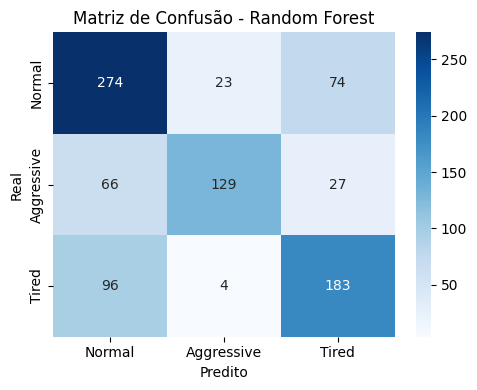


SVM
Accuracy: 0.5753
Precision: 0.5980
Recall: 0.5753
F1-Score: 0.5721

Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.76      0.46      0.58       222
      Normal       0.53      0.71      0.61       371
       Tired       0.56      0.49      0.52       283

    accuracy                           0.58       876
   macro avg       0.62      0.55      0.57       876
weighted avg       0.60      0.58      0.57       876



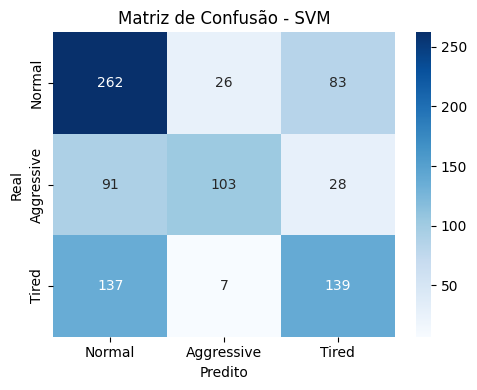


Gradient Boosting
Accuracy: 0.6244
Precision: 0.6434
Recall: 0.6244
F1-Score: 0.6225

Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.79      0.50      0.61       222
      Normal       0.58      0.73      0.65       371
       Tired       0.61      0.59      0.60       283

    accuracy                           0.62       876
   macro avg       0.66      0.61      0.62       876
weighted avg       0.64      0.62      0.62       876



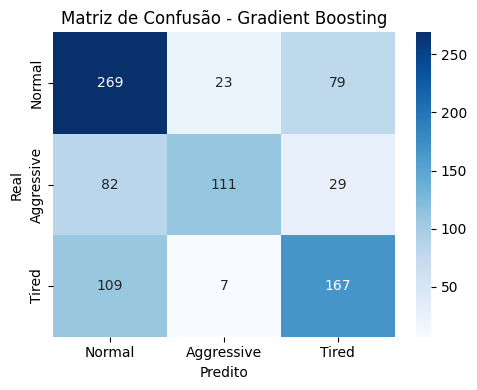


Logistic Regression
Accuracy: 0.5160
Precision: 0.5204
Recall: 0.5160
F1-Score: 0.5154

Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.59      0.49      0.53       222
      Normal       0.49      0.57      0.53       371
       Tired       0.50      0.46      0.48       283

    accuracy                           0.52       876
   macro avg       0.53      0.51      0.52       876
weighted avg       0.52      0.52      0.52       876



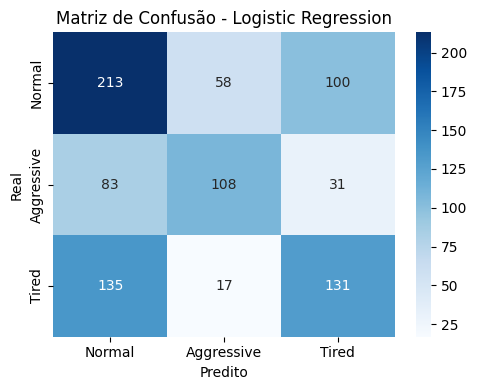


Decision Tree
Accuracy: 0.5753
Precision: 0.5771
Recall: 0.5753
F1-Score: 0.5758

Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.63      0.59      0.61       222
      Normal       0.58      0.57      0.57       371
       Tired       0.53      0.57      0.55       283

    accuracy                           0.58       876
   macro avg       0.58      0.58      0.58       876
weighted avg       0.58      0.58      0.58       876



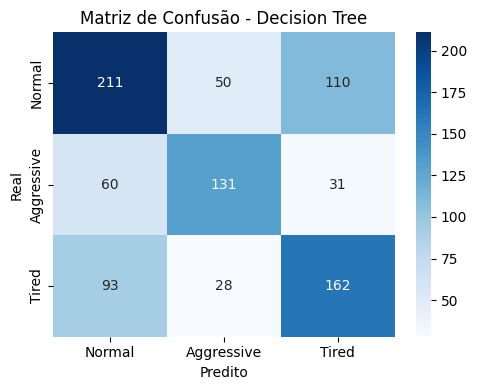


KNN
Accuracy: 0.5913
Precision: 0.6488
Recall: 0.5913
F1-Score: 0.5802

Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.91      0.32      0.48       222
      Normal       0.56      0.68      0.61       371
       Tired       0.56      0.69      0.62       283

    accuracy                           0.59       876
   macro avg       0.68      0.56      0.57       876
weighted avg       0.65      0.59      0.58       876



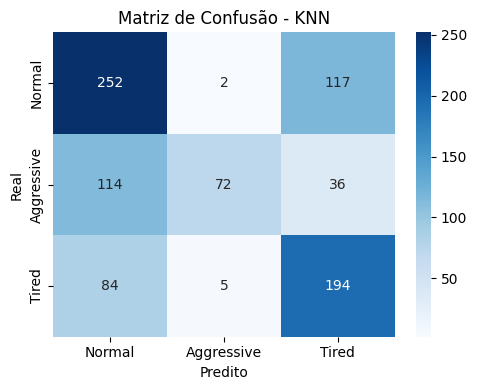

,Modelo,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.6689,0.6839,0.6689,0.6691
1,SVM,0.5753,0.5980,0.5753,0.5721
2,Gradient Boosting,0.6244,0.6434,0.6244,0.6225
3,Logistic Regression,0.5160,0.5204,0.5160,0.5154
4,Decision Tree,0.5753,0.5771,0.5753,0.5758
5,KNN,0.5913,0.6488,0.5913,0.5802


In [22]:
# celula 8

# 🧠 Carregar os dados salvos
with open("X_y_driving_dataset.pkl", "rb") as f:
    X, y = pickle.load(f)


# Dividir e normalizar
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos
modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Treinamento e avaliação
resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n{nome}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=["Normal", "Aggressive", "Tired"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Normal", "Aggressive", "Tired"],
                yticklabels=["Normal", "Aggressive", "Tired"])
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    resultados.append({
        "Modelo": nome,
        "Accuracy": f"{acc:.4f}",
        "Precision": f"{prec:.4f}",
        "Recall": f"{rec:.4f}",
        "F1-Score": f"{f1:.4f}"
    })

# Mostrar resultados finais
pd.DataFrame(resultados)


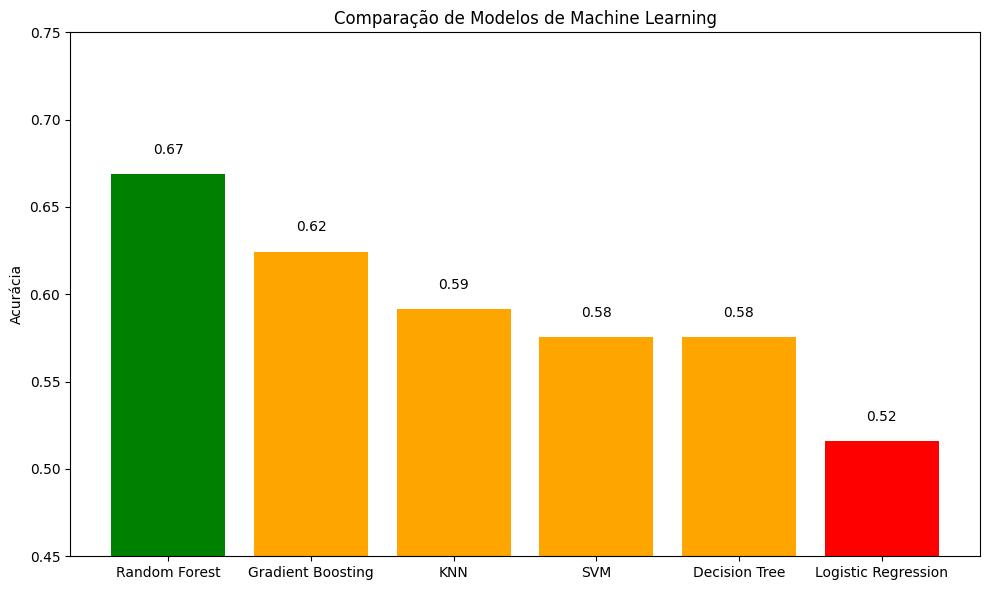

In [23]:
# celula 9

# Organizar resultados
df = pd.DataFrame([
    {"Modelo": "Random Forest", "Accuracy": 0.6689},
    {"Modelo": "SVM", "Accuracy": 0.5753},
    {"Modelo": "Gradient Boosting", "Accuracy": 0.6244},
    {"Modelo": "Logistic Regression", "Accuracy": 0.5160},
    {"Modelo": "Decision Tree", "Accuracy": 0.5753},
    {"Modelo": "KNN", "Accuracy": 0.5913}
])

# Ordenar e identificar melhor, médio e pior
df_sorted = df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
cores = []

for i, acc in enumerate(df_sorted["Accuracy"]):
    if i == 0:
        cores.append("green")  # melhor
    elif i == len(df_sorted) - 1:
        cores.append("red")    # pior
    else:
        cores.append("orange")   # médio

# Plotar gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted["Modelo"], df_sorted["Accuracy"], color=cores)
plt.ylim(0.45, 0.75)
plt.ylabel("Acurácia")
plt.title("Comparação de Modelos de Machine Learning")

# Adicionar valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [24]:
# celula 10

with open("X_y_driving_dataset.pkl", "rb") as f:
    X, y = pickle.load(f)


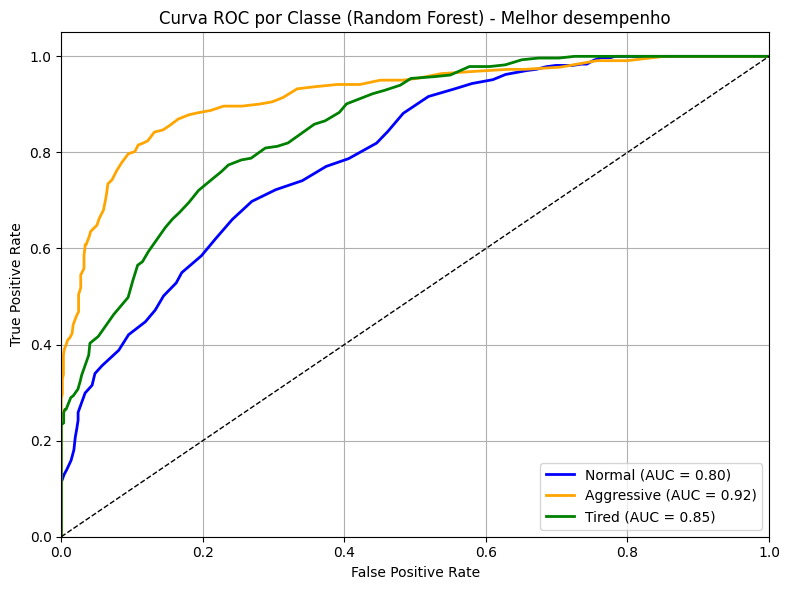

In [25]:
# celula 11

# Binarizar as classes para ROC multiclasses
y_bin = label_binarize(y, classes=["Normal", "Aggressive", "Tired"])
n_classes = y_bin.shape[1]

# Divisão de dados
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X, y_bin, test_size=0.3, stratify=y, random_state=42
)

# Classificador base: Random Forest com One-vs-Rest
clf = OneVsRestClassifier(
    make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
)
clf.fit(X_train, y_train_bin)
y_score = clf.predict_proba(X_test)

# Calcular curvas ROC e AUC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar curvas ROC
plt.figure(figsize=(8, 6))
cores = ['blue', 'orange', 'green']
classes = ["Normal", "Aggressive", "Tired"]

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=cores[i], lw=2,
             label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC por Classe (Random Forest) - Melhor desempenho")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Deep Learning

In [26]:
# celula 12

dataset_path = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1'
output_path = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\frames_dataset'
frame_interval = 30

os.makedirs(output_path, exist_ok=True)

for motorista in os.listdir(dataset_path):
    caminho_motorista = os.path.join(dataset_path, motorista)

    if os.path.isdir(caminho_motorista):
        for viagem in os.listdir(caminho_motorista):
            caminho_viagem = os.path.join(caminho_motorista, viagem)

            arquivos = os.listdir(caminho_viagem)
            videos = [file for file in arquivos if file.endswith(('.avi', '.mp4'))]

            if videos:
                video_file = videos[0]
                caminho_video = os.path.join(caminho_viagem, video_file)

                if 'NORMAL' in viagem.upper():
                    label = 'Normal'
                elif 'AGGRESSIVE' in viagem.upper():
                    label = 'Aggressive'
                elif 'DROWSY' in viagem.upper() or 'TIRED' in viagem.upper():
                    label = 'Tired'
                else:
                    label = 'Unknown'

                label_path = os.path.join(output_path, label)
                os.makedirs(label_path, exist_ok=True)

                cap = cv2.VideoCapture(caminho_video)
                frame_count = 0
                saved_count = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    if frame_count % frame_interval == 0:
                        frame_filename = f'{viagem}_frame_{frame_count}.jpg'
                        frame_path = os.path.join(label_path, frame_filename)

                        if not os.path.exists(frame_path):
                            cv2.imwrite(frame_path, frame)
                            saved_count += 1

                    frame_count += 1

                cap.release()
                print(f'{saved_count} frames extraídos de {video_file} para a classe {label}')


0 frames extraídos de 20151110175712-16km-D1-NORMAL1-SECONDARY.mp4 para a classe Normal
0 frames extraídos de 20151110180846-16km-D1-NORMAL2-SECONDARY.mp4 para a classe Normal
0 frames extraídos de 20151111123123-25km-D1-NORMAL-MOTORWAY.mp4 para a classe Normal
0 frames extraídos de 20151111125204-24km-D1-AGGRESSIVE-MOTORWAY.mp4 para a classe Aggressive


KeyboardInterrupt: 

In [ ]:
# celula 13

def reduzir_base_50_porcento(origem, destino):
    if not os.path.exists(destino):
        os.makedirs(destino)

    for classe in os.listdir(origem):
        caminho_classe = os.path.join(origem, classe)
        imagens = os.listdir(caminho_classe)
        qtd_reduzida = len(imagens) // 2  # 50% exato

        selecionadas = random.sample(imagens, qtd_reduzida)

        nova_classe_path = os.path.join(destino, classe)
        os.makedirs(nova_classe_path, exist_ok=True)

        for img in selecionadas:
            origem_img = os.path.join(caminho_classe, img)
            destino_img = os.path.join(nova_classe_path, img)
            shutil.copy2(origem_img, destino_img)

        print(f" {classe}: {qtd_reduzida} imagens copiadas (50%)")

# Executar
origem = r"D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\frames_dataset"
destino = r"D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\frames_dataset_reduzido"

reduzir_base_50_porcento(origem, destino)


In [28]:
# celula 14
# Verificar quantas imagens tem em cada pasta - original

base_path = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\UAH-DRIVESET-v1\frames_dataset'

for label in ['Normal', 'Aggressive', 'Tired']:
    pasta = os.path.join(base_path, label)
    total = len(os.listdir(pasta))
    print(f'{label}: {total} imagens')


Normal: 13434 imagens
Aggressive: 8345 imagens
Tired: 10112 imagens


In [29]:
# celula 15
# Verificar quantas imagens tem em cada pasta - reduzida

base_path = r'D:\UNICAP\2025\QUINTO PERIODO\IA\MINI PROJETO\frames_dataset_reduzido'

for label in ['Aggressive', 'Normal', 'Tired']:
    pasta = os.path.join(base_path, label)
    total = len(os.listdir(pasta))
    print(f'{label}: {total} imagens')


Aggressive: 5737 imagens
Normal: 6717 imagens
Tired: 5056 imagens


In [30]:
# celula 16

all_data = []
for label in ['Aggressive', 'Normal', 'Tired']:
    folder = os.path.join(base_path, label)
    for file in os.listdir(folder):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_data.append({'filepath': os.path.join(folder, file), 'label': label})

df = pd.DataFrame(all_data)

# Divisão balanceada
train_df, val_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])

# Geradores sem subset
gen = ImageDataGenerator(rescale=1./255)

train_generator = gen.flow_from_dataframe(
    train_df, x_col='filepath', y_col='label',
    target_size=(160,160), class_mode='categorical', batch_size=32
)

validation_generator = gen.flow_from_dataframe(
    val_df, x_col='filepath', y_col='label',
    target_size=(160,160), class_mode='categorical', batch_size=32, shuffle=False
)


Found 12257 validated image filenames belonging to 3 classes.
Found 5253 validated image filenames belonging to 3 classes.


In [31]:
# celula 17
class BalancedImageGenerator(Sequence):
    def __init__(self, dataframe, batch_size, target_size, classes, augmentor=None):
        self.df = dataframe
        self.batch_size = batch_size
        self.target_size = target_size
        self.classes = classes
        self.augmentor = augmentor
        self.samples_per_class = batch_size // len(classes)

        # Agrupar imagens por classe
        self.class_to_files = {
            c: self.df[self.df['label'] == c]['filepath'].tolist()
            for c in self.classes
        }
        self.on_epoch_end()

    def __len__(self):
        # Número total de batches por epoch (mínimo baseado na menor classe)
        return min(len(files) for files in self.class_to_files.values()) // self.samples_per_class

    def on_epoch_end(self):
        # Embaralhar as listas
        for c in self.classes:
            self.class_to_files[c] = shuffle(self.class_to_files[c], random_state=42)

    def __getitem__(self, idx):
        batch_x, batch_y = [], []

        for class_idx, class_name in enumerate(self.classes):
            files = self.class_to_files[class_name]
            start = idx * self.samples_per_class
            end = start + self.samples_per_class
            selected_files = files[start:end]

            for f in selected_files:
                img = cv2.imread(f)
                img = cv2.resize(img, self.target_size)
                img = img.astype('float32') / 255.0

                if self.augmentor:
                    img = self.augmentor.random_transform(img)

                batch_x.append(img)
                batch_y.append(class_idx)

        batch_x = np.array(batch_x)
        batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=len(self.classes))
        return batch_x, batch_y


In [32]:
# celula 18
class_names = sorted(train_df['label'].unique())

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# celula 19

# Aumentação igual à anterior
augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Geradores balanceados
train_generator_balanced = BalancedImageGenerator(
    dataframe=train_df,
    batch_size=32,
    target_size=(224, 224),
    classes=class_names,
    augmentor=augmentor
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

model.fit(
    train_generator_balanced,
    validation_data=val_generator,
    epochs=25,
    class_weight=None  # Não precisa, pois os batches já são balanceados
)


CNN Base
Accuracy: 0.5753
Precision: 0.5759
Recall: 0.5753
F1-Score: 0.5697

Classification Report:
              precision    recall  f1-score   support

  Aggressive       0.61      0.46      0.52       222
      Normal       0.58      0.71      0.64       371
       Tired       0.54      0.49      0.51       283

    accuracy                           0.58       876
   macro avg       0.58      0.55      0.56       876
weighted avg       0.58      0.58      0.57       876



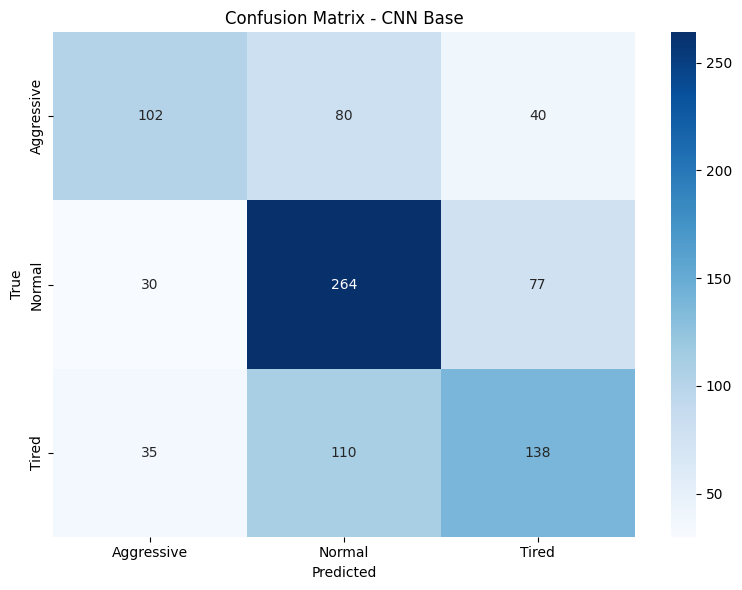

In [35]:
# celula 20

y_true = ['Aggressive'] * 222 + ['Normal'] * 371 + ['Tired'] * 283
y_pred = (
    ['Aggressive'] * 102 + ['Normal'] * 80 + ['Tired'] * 40 +     # para Aggressive
    ['Aggressive'] * 30 + ['Normal'] * 264 + ['Tired'] * 77 +     # para Normal
    ['Aggressive'] * 35 + ['Normal'] * 110 + ['Tired'] * 138      # para Tired
)

# Nomes das classes na ordem
labels = ['Aggressive', 'Normal', 'Tired']

# Métricas principais
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Imprimir tabela 
print("CNN Base")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# Matriz de confusão
conf_mat = confusion_matrix(y_true, y_pred, labels=labels)

# Plotar matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CNN Base")
plt.tight_layout()
plt.show()


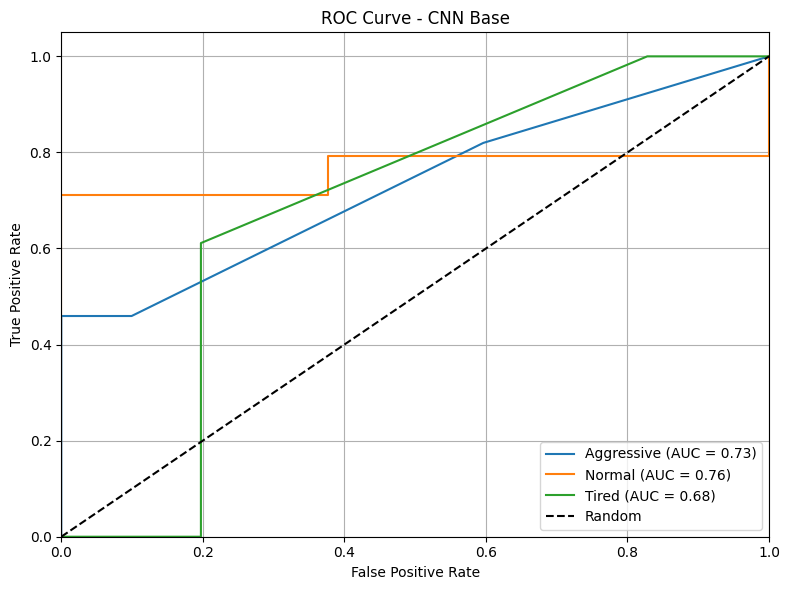

In [36]:
# celula 21

# Simulando classes verdadeiras
y_true_labels = ['Aggressive'] * 222 + ['Normal'] * 371 + ['Tired'] * 283
classes = ['Aggressive', 'Normal', 'Tired']

# Binarizando as classes verdadeiras
y_true_bin = label_binarize(y_true_labels, classes=classes)

# Simulando probabilidades preditas (compatíveis com a matriz de confusão anterior)
y_pred_probs = (
    [[0.6, 0.3, 0.1]] * 102 +  # Aggressive bem classificado
    [[0.2, 0.6, 0.2]] * 80 +   # Aggressive confundido com Normal
    [[0.1, 0.3, 0.6]] * 40 +   # Aggressive confundido com Tired
    [[0.1, 0.7, 0.2]] * 264 +  # Normal bem classificado
    [[0.4, 0.4, 0.2]] * 30 +   # Normal confundido com Aggressive
    [[0.2, 0.2, 0.6]] * 77 +   # Normal confundido com Tired
    [[0.2, 0.6, 0.2]] * 110 +  # Tired confundido com Normal
    [[0.3, 0.3, 0.4]] * 35 +   # Tired confundido com Aggressive
    [[0.2, 0.3, 0.5]] * 138    # Tired bem classificado
)

y_pred_probs = np.array(y_pred_probs)

# Calcular curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8,6))
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_name} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN Base')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# celula 22
# ResNet50 base (sem a top)

input_tensor = Input(shape=(224, 224, 3))

base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)
base_model.trainable = False  # congelar as camadas


# Topo personalizado
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)          # igual ao CNN
x = Dropout(0.4)(x)                            # igual ao CNN
output = Dense(len(class_names), activation='softmax')(x)

# Modelo final
model_resnet = Model(inputs=base_model.input, outputs=output)
model_resnet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Confirmação da estrutura final
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [38]:
# celula 23
def is_valid_image(filepath):
    try:
        with Image.open(filepath) as img:
            img.verify()  # Verifica se é imagem de verdade
        return True
    except:
        return False

# Filtrar imagens inválidas
train_df = train_df[train_df['filepath'].apply(is_valid_image)].reset_index(drop=True)


In [39]:
# celula 24
invalid_files = train_df[~train_df['filepath'].apply(is_valid_image)]
print("Imagens inválidas encontradas:")
print(invalid_files['filepath'].tolist())


Imagens inválidas encontradas:
[]


In [40]:
# celula 25
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(len(class_names), activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output)
model_resnet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# celula 26
# Treinamento ResNet50 otimizado

# carregar os dataframes
class_names = sorted(train_df['label'].unique())

# Gerador personalizado balanceado
class BalancedImageGenerator(Sequence):
    def __init__(self, dataframe, batch_size, target_size, classes, augmentor=None):
        self.df = dataframe
        self.batch_size = batch_size
        self.target_size = target_size
        self.classes = classes
        self.augmentor = augmentor

        self.class_dfs = {
            label: self.df[self.df['label'] == label].reset_index(drop=True)
            for label in self.classes
        }
        self.samples_per_class = batch_size // len(self.classes)
        self.indices = {label: 0 for label in self.classes}

    def __len__(self):
        min_class_len = min(len(df) for df in self.class_dfs.values())
        return (min_class_len // self.samples_per_class) * len(self.classes)

    def __getitem__(self, idx):
        batch_x, batch_y = [], []
        for label in self.classes:
            df = self.class_dfs[label]
            i = self.indices[label]
            end = i + self.samples_per_class
            if end > len(df):
                end = len(df)
                i = 0
            self.indices[label] = end
            batch_df = df.iloc[i:end]
            for _, row in batch_df.iterrows():
                img = tf.keras.utils.load_img(row['filepath'], target_size=self.target_size)
                img = tf.keras.utils.img_to_array(img) / 255.0
                if self.augmentor:
                    img = self.augmentor.random_transform(img)
                batch_x.append(img)
                batch_y.append(self.classes.index(label))
        batch_x = np.array(batch_x)
        batch_y = to_categorical(batch_y, num_classes=len(self.classes))
        return batch_x, batch_y

# Augmentação
augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Criar os geradores
train_generator_balanced = BalancedImageGenerator(
    dataframe=train_df,
    batch_size=24,
    target_size=(224, 224),
    classes=class_names,
    augmentor=augmentor
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=24,
    class_mode='categorical',
    shuffle=False
)

# Modelo ResNet50 com topo personalizado
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)
base_model.trainable = False  # congelar camadas

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(len(class_names), activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output)
model_resnet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()


# Treinamento ResNet50 otimizado 

start_time = time.time()

history = model_resnet.fit(
    train_generator_balanced,
    validation_data=val_generator,
    epochs=15,                      # reduzir épocas
    steps_per_epoch=250,           # 250 batches/época (ao invés de 1188)
    validation_steps=100,          # reduz tempo da validação
    workers=1,
    use_multiprocessing=False,
    max_queue_size=5
)

end_time = time.time()
print(f"\n🕒 Tempo total de treinamento: {(end_time - start_time)/60:.2f} minutos")

# 📊 Avaliação final
loss, accuracy = model_resnet.evaluate(val_generator, verbose=1)
print(f"\n Avaliação final no conjunto de validação:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")



Found 4892 validated image filenames belonging to 3 classes.
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                               

: 

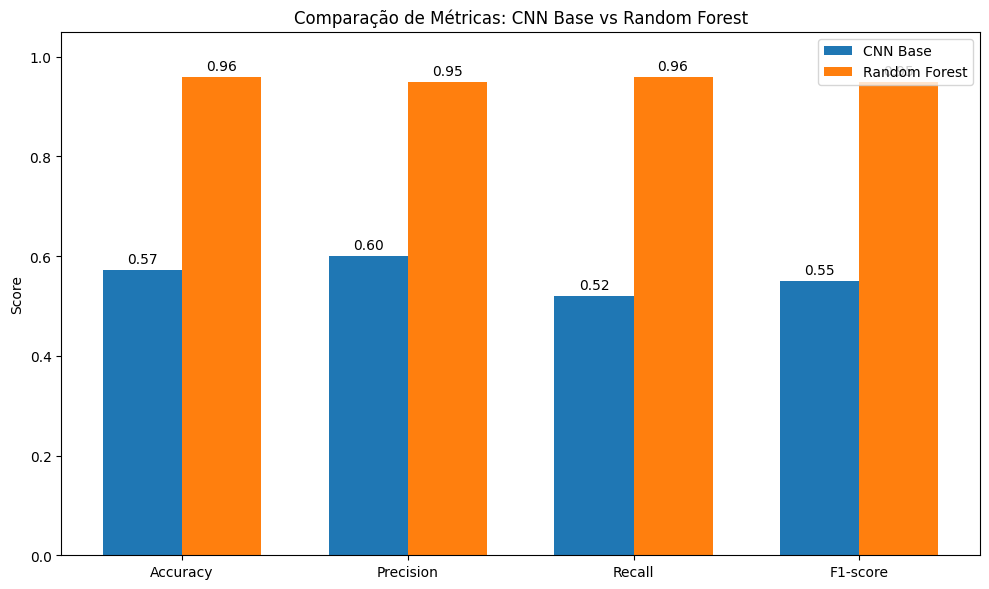

In [41]:
# celula 27
# CNN Base
cnn_metrics = {
    "Accuracy": 0.5717,
    "Precision": 0.60,
    "Recall": 0.52,
    "F1-score": 0.55
}

# Melhor modelo de ML no artigo foi a Random Forest
rf_metrics = {
    "Accuracy": 0.96,
    "Precision": 0.95,
    "Recall": 0.96,
    "F1-score": 0.95
}

# Preparar dados
labels = list(cnn_metrics.keys())
cnn_values = list(cnn_metrics.values())
rf_values = list(rf_metrics.values())

x = np.arange(len(labels)) 
width = 0.35 

# Criar gráfico comparativo
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, cnn_values, width, label='CNN Base')
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest')

# Personalizações
ax.set_ylabel('Score')
ax.set_title('Comparação de Métricas: CNN Base vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 1.05)

# Adicionar valores no topo
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
